# Análise Exploratória de dados

O objetivo dessa seção é entender de forma profunda o comportamento do mercado cinematografico a partir do dataframe já processado.

## Perguntas norteadoras

Questionamentos que repreentam os desejos dos stackholders. 

a. Qual filme você recomendaria para uma pessoa que você não conhece?

b. Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

c. Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?


## Processos tomados de forma iterativa

1. Análise macro dos dados: entendimento de outliers, comportamento univariado, correlações fortes
    - Esse passo é extremamente importante para indicar o caminho de entendimento do comportamento das variáveis alvo
2. Análise bivariada: escolha dos principais fatores encontrados no primeiro ato combinado com objetivo de responder as perguntas. Principal parte da análise
    - Etapa em que as perguntas serão respondidas de modo inicial e direto. 
3. Processamento de linguagem
3. Conclusão geral: principais insights sintetizados





In [316]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio

# Esta é a linha mágica:
pio.renderers.default = "png"


path = '..\\data\\processed\\final_df.csv'

df = pd.read_csv(path)


In [317]:
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,...,Original_Language,Production_Companies,Production_Countries,Keywords,date_details,Gross_fill,Brute_Profit,ROI,Certificate_ord_external,Timestamp
0,The Godfather,1972,NC-17,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.,100.0,Francis Ford Coppola,Marlon Brando,...,en,"['Paramount Pictures', 'Alfran Productions']",['United States of America'],"['based on novel or book', 'loss of loved one', 'love at first sight', 'italy', 'gangster', 'symbolism', 'patriarch', 'europe', 'organized crime', 'mafia', 'religion', 'lawyer', 'revenge motive', 'crime family', 'sicilian mafia', 'religious hypocrisy', 'gun violence', 'rise to power', 'dead horse', 'gang violence', '1940s', '1950s', 'complex', 'mafia war', 'amused', 'compassionate', 'complicated', 'enchant', 'le parrain', 'ο νονός', 'крёстный отец']",1972-03-14,134966411.0,2.390664e+08,39.844402,4,69379200
1,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",9.0,"When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.",84.0,Christopher Nolan,Christian Bale,...,en,"['Warner Bros. Pictures', 'Legendary Pictures', 'Syncopy', 'DC']","['United Kingdom', 'United States of America']","['sadism', 'chaos', 'secret identity', 'crime fighter', 'superhero', 'anti hero', 'scarecrow', 'based on comic', 'vigilante', 'organized crime', 'tragic hero', 'anti villain', 'criminal mastermind', 'district attorney', 'super power', 'super villain', 'neo-noir', 'bold']",2008-07-14,534858444.0,8.195584e+08,4.430046,3,1215993600
2,The Godfather: Part II,1974,NC-17,202,"Crime, Drama",9.0,"The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.",90.0,Francis Ford Coppola,Al Pacino,...,en,"['Paramount Pictures', 'The Coppola Company']",['United States of America'],"[""new year's eve"", 'new york city', 'based on novel or book', 'italian american', 'cuba', 'italy', 'gangster', 'praise', 'blackmail', 'symbolism', 'senator', 'revenge', 'murder', 'betrayal', 'organized crime', 'extortion', 'mafia', 'lawyer', 'suburb', 'sicilian mafia', 'corrupt politician', 'aggressive', '1950s', 'new year', 'vindictive', 'cautionary', 'violence', 'admiring', 'audacious']",1974-12-12,57300000.0,8.960000e+07,6.892308,4,156038400
3,12 Angry Men,1957,G,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence.,96.0,Sidney Lumet,Henry Fonda,...,en,"['United Artists', 'Orion-Nova Productions']",['United States of America'],"['death penalty', 'anonymity', 'court case', 'court', 'judge', 'jurors', 'father murder', 'class', 'heat', 'innocence', 'puerto rico', 'based on play or musical', 'black and white', 'courtroom', 'courtroom drama', 'dialog driven', 'persidangan', 'sidang']",1957-04-10,4360000.0,3.962249e+06,9.961632,0,-401673600
4,The Lord of the Rings: The Return of the King,2003,G,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men against Sauron's army to draw his gaze from Frodo and Sam as they approach Mount Doom with the One Ring.,94.0,Peter Jackson,Elijah Wood,...,en,"['New Line Cinema', 'WingNut Films', 'The Saul Zaentz Company']","['New Zealand', 'United States of America']","['army', 'based on novel or book', 'elves', 'dwarf', 'magic', 'kingdom', 'obsession', 'bravery', 'castle', 'volcano', 'giant spider', 'sequel', 'honor', 'king', 'brutality', 'madness', 'split personality', 'fantasy world', 'wizard', 'epic battle', 'journey', 'ring', 'quest', 'live action and animation', ""hero's journey"", 'high fantasy', 'wraith', 'sword and sorcery', 'power madness', 'great war', 'trekking', 'good versus evil', 's

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Series_Title              999 non-null    object 
 1   Released_Year             999 non-null    int64  
 2   Certificate               999 non-null    object 
 3   Runtime                   999 non-null    int64  
 4   Genre                     999 non-null    object 
 5   IMDB_Rating               999 non-null    float64
 6   Overview                  999 non-null    object 
 7   Meta_score                842 non-null    float64
 8   Director                  999 non-null    object 
 9   Star1                     999 non-null    object 
 10  Star2                     999 non-null    object 
 11  Star3                     999 non-null    object 
 12  Star4                     999 non-null    object 
 13  No_of_Votes               999 non-null    int64  
 14  Gross     

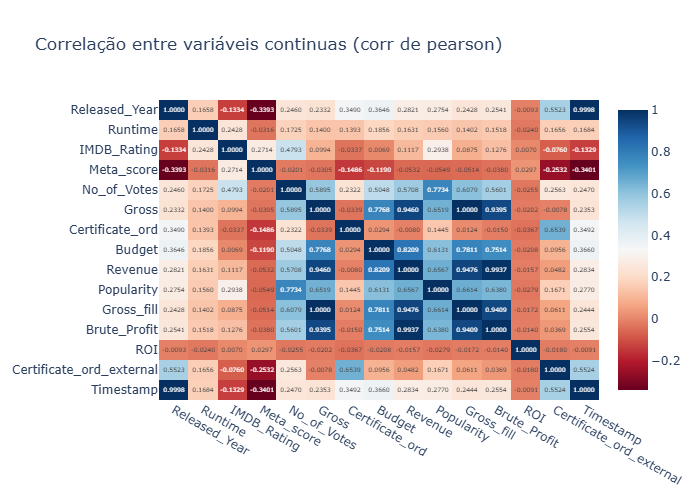

In [319]:
import os
corr = df.corr(numeric_only = True, )

fig = px.imshow(
    corr,
    text_auto = '.4f',
    aspect = 'auto',
    title = 'Correlação entre variáveis continuas (corr de pearson)',
    color_continuous_scale = 'RdBu'
)

fig.update_layout(
    width = 1000,
    height = 800
)

pasta_img = '..\\reports\\figures\\'

if not os.path.exists(pasta_img):
    os.makedirs(pasta_img)

path_img = pasta_img + 'correlacao_pearson.png'
fig.write_image(path_img, scale = 3)


fig

In [320]:
nums_cols = df.select_dtypes(include = np.number).columns

for i in nums_cols:
  outs = df[i]

  q1 = outs.quantile(0.25)
  q3 = outs.quantile(0.75)

  iqr = q3 - q1

  outliers_low = len(outs[outs < q1 - 1.5 * iqr])
  outliers_high = len(outs[outs > q3 + 1.5 * iqr])



  print('-'*20)
  print(f'Feature: {i}')
  print(f'Outliers low: {outliers_low}')
  print(f'Outliers high: {outliers_high}')
  print(f'Total: {(outliers_low) + outliers_high}')


--------------------
Feature: Released_Year
Outliers low: 7
Outliers high: 0
Total: 7
--------------------
Feature: Runtime
Outliers low: 1
Outliers high: 28
Total: 29
--------------------
Feature: IMDB_Rating
Outliers low: 0
Outliers high: 12
Total: 12
--------------------
Feature: Meta_score
Outliers low: 7
Outliers high: 0
Total: 7
--------------------
Feature: No_of_Votes
Outliers low: 0
Outliers high: 66
Total: 66
--------------------
Feature: Gross
Outliers low: 0
Outliers high: 88
Total: 88
--------------------
Feature: Certificate_ord
Outliers low: 0
Outliers high: 0
Total: 0
--------------------
Feature: Budget
Outliers low: 0
Outliers high: 109
Total: 109
--------------------
Feature: Revenue
Outliers low: 0
Outliers high: 116
Total: 116
--------------------
Feature: Popularity
Outliers low: 0
Outliers high: 58
Total: 58
--------------------
Feature: Gross_fill
Outliers low: 0
Outliers high: 122
Total: 122
--------------------
Feature: Brute_Profit
Outliers low: 0
Outliers hi

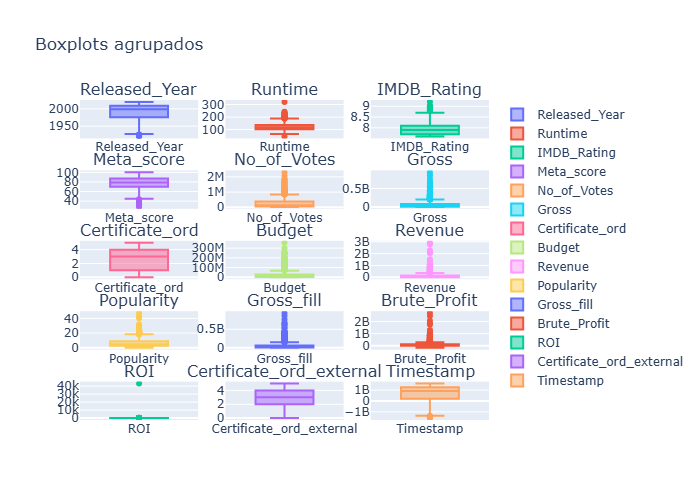

In [321]:
from math import ceil

n_cols = 3  # número de gráficos por linha
n_rows = ceil(len(nums_cols)/n_cols)

fig = make_subplots(
    rows=n_rows,
    cols=n_cols,
    subplot_titles=nums_cols
)

for i, col in enumerate(nums_cols):
    row = i // n_cols + 1
    col_pos = i % n_cols + 1
    fig.add_trace(go.Box(y=df[col], name=col), row=row, col=col_pos)

fig.update_layout(width=1200, height=300*n_rows, title_text="Boxplots agrupados")
fig.show()


path_img = pasta_img + 'boxplots.png'
fig.write_image(path_img, scale = 3)


In [322]:
median_roi = df['ROI'].median()

for i in df[df['ROI'] > 500].index:
    df.loc[i, 'ROI'] = median_roi

In [323]:
import scipy.stats as stats 

cat_names = ['Director', 'Genre', 'Star1', 'Star2', 'Star3', 'Star4']
cat_cols = df[cat_names]

num_names = df.select_dtypes(include=['number']).columns.tolist()
num_cols = df[['IMDB_Rating', 'Gross_fill', 'Budget', 'Revenue', 'ROI', 'Popularity', 'Brute_Profit']]


def anova(df, num_col, cat_col):

    grouped = df.groupby(cat_col)[num_col]

    groups = [group.values[~pd.isnull(group.values)] for _, group in grouped]

    f_val, p_val = stats.f_oneway(*groups)
    return p_val

results = []

def testing_anova(df, categorical_columns, numerical_cols):
    results = []
    for cat_col in categorical_columns:
        for num_col in numerical_cols:
            min_sample_size = 4
            
            df_temp = df[[cat_col, num_col]].dropna()

            value_counts = df_temp[cat_col].value_counts()
            to_keep = value_counts[value_counts >= min_sample_size].index
            df_filtered = df_temp[df_temp[cat_col].isin(to_keep)]

            if df_filtered[cat_col].nunique() < 2:
                continue

            p_val = anova(df_filtered, num_col, cat_col)

            if p_val is not None and p_val < 0.05:
                print(f"Significativo: {num_col} e {cat_col} (p-valor={p_val:.6f})")
                results.append((cat_col, num_col, p_val))

    return 

testing_anova(df, cat_cols, num_cols)

Significativo: IMDB_Rating e Director (p-valor=0.000011)
Significativo: Gross_fill e Director (p-valor=0.000000)
Significativo: Budget e Director (p-valor=0.000000)
Significativo: Revenue e Director (p-valor=0.000000)
Significativo: ROI e Director (p-valor=0.039549)
Significativo: Popularity e Director (p-valor=0.000000)
Significativo: Brute_Profit e Director (p-valor=0.000000)
Significativo: Gross_fill e Genre (p-valor=0.000000)
Significativo: Budget e Genre (p-valor=0.000000)
Significativo: Revenue e Genre (p-valor=0.000000)
Significativo: Popularity e Genre (p-valor=0.000000)
Significativo: Brute_Profit e Genre (p-valor=0.000000)
Significativo: IMDB_Rating e Star1 (p-valor=0.003293)
Significativo: Gross_fill e Star1 (p-valor=0.000000)
Significativo: Budget e Star1 (p-valor=0.000000)
Significativo: Revenue e Star1 (p-valor=0.000000)
Significativo: Popularity e Star1 (p-valor=0.000000)
Significativo: Brute_Profit e Star1 (p-valor=0.000000)
Significativo: Gross_fill e Star2 (p-valor=0.

### **Principais Achados da Análise:**

* **Impacto Financeiro por Diretor:** Identifica quais diretores estão consistentemente associados aos filmes de maior bilheteria.
* **Lucratividade por Gênero:** Determina quais gêneros de filme geram a receita de bilheteria mais significativa.
* **Reconhecimento Crítico por Diretor:** Aponta quais diretores produzem consistentemente os filmes mais bem avaliados, segundo as notas do IMDB.
* **Retorno Sobre o Investimento (ROI) por Diretor:** Analisa quais diretores são mais eficientes em converter orçamento em lucro.
* **Custos de Produção por Gênero:** Avalia quais gêneros geralmente exigem os maiores orçamentos de produção.
* **Poder de Atração do Ator Principal:** Investiga a correlação entre a estrela principal e a receita bruta de um filme.
* **Preferência do Público por Gênero:** Identifica quais gêneros recebem consistentemente as avaliações mais altas do público.

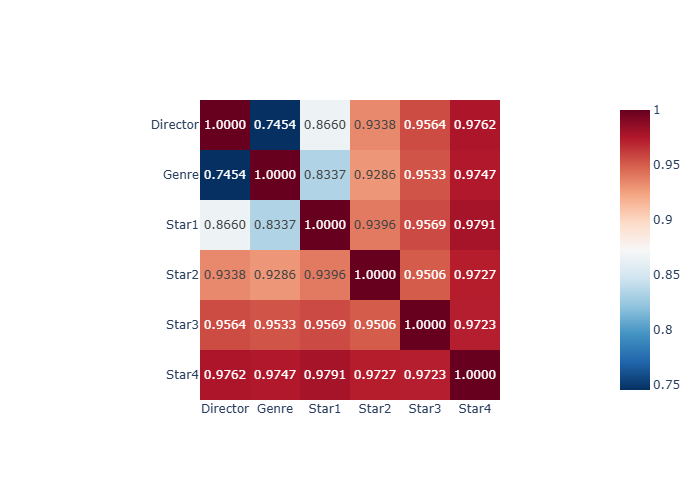

In [324]:
from scipy.stats import chi2_contingency


cramers_matrix = pd.DataFrame(
    np.nan,
    index=cat_names,
    columns=cat_names
)

np.fill_diagonal(cramers_matrix.values, 1.0)


def cramers_v(contingency_table):
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    return np.sqrt(phi2 / min(k-1, r-1))


for i, col1 in enumerate(cat_names):
    for j, col2 in enumerate(cat_names):
        if i < j:
            contingency = pd.crosstab(
                df[col1],
                df[col2]
            )
            cv = cramers_v(contingency.values)
            cramers_matrix.loc[col1, col2] = cv
            cramers_matrix.loc[col2, col1] = cv

fig = px.imshow(
    cramers_matrix,
    text_auto='.4f',
    color_continuous_scale='RdBu_r'
    )

fig.update_layout(
    width=1000,
    height=800,
    margin=dict(l=100, r=100, t=100, b=100),

)

fig.show()


path_img = pasta_img + 'cramers_v.png'
fig.write_image(path_img, scale = 3)


### Qual filme você recomendaria para uma pessoa que você não conhece?

Para recomendar um filme para alguem que voce não conhece, a melhor estratégia é utilizar uma pontuação baseado na nota e "popularidade". Por conta disso foi construida uma formula que pondera a avaliação do imdb com o numero de votos. Além disso foi adicionado arbritáriamente o fator de poplaridade do imdb, que é calculado diariamente e leva em conta diversos fatores importantes.

Com tudo isso é possivel encontrar uma pelicula que seja facil de ser encontrada em streamings (ou no cinema) e extremamente adorada pelo público.

1.  Uma **pontuação de avaliação ponderada** que ajusta a nota de um filme com base na quantidade de votos que ele recebeu. Isso evita que filmes com poucas avaliações, mas nota alta, fiquem no topo da lista indevidamente.
2.  Uma **métrica de popularidade**, que mede o "buzz" ou o interesse atual em torno do filme.

A combinação desses fatores resulta em um **Índice de Recomendação** robusto.

A fórmula para a pontuação ponderada (WR) é:
$$\text{WR} = \left( \frac{v}{v+m} \right) R + \left( \frac{m}{v+m} \right) C$$

Onde:
* $v$: é o número de votos que o filme recebeu (`No_of_Votes`).
* $m$: é o número mínimo de votos necessários para constar no ranking (neste caso, o quantil de 90%).
* $R$: é a nota média do filme (`IMDB_Rating`).
* $C$: é a nota média de todos os filmes do conjunto de dados.

Em seguida, o Índice de Recomendação (RI) final é calculado como uma média ponderada entre essa pontuação e a popularidade do filme (normalizada para uma escala de 0 a 10):
$$\text{RI} = (w_r \times \text{WR}) + (w_p \times P_{\text{norm}})$$

Onde:
* $w_r$: é o peso atribuído à pontuação ponderada (ex: 90%).
* $w_p$: é o peso atribuído à popularidade (ex: 10%).
* $P_{\text{norm}}$: é a popularidade do filme, normalizada.

In [325]:
from sklearn.preprocessing import MinMaxScaler

def add_recommendation_index(df, vote_quantile=0.90, weight_rating=0.9, weight_popularity=0.1):
    C = df['IMDB_Rating'].mean()

    m = df['No_of_Votes'].quantile(vote_quantile)


    scaler = MinMaxScaler(feature_range=(0, 10))
    df['Popularity_norm'] = scaler.fit_transform(df[['Popularity']])


    def weighted_rating(x, m=m, C=C):
        v = x['No_of_Votes']
        R = x['IMDB_Rating']
        return (v/(v+m) * R) + (m/(v+m) * C)

    df['Weighted_Score'] = df.apply(weighted_rating, axis=1)

    df['Recommendation_Index'] = (
        weight_rating * df['Weighted_Score'] +
        weight_popularity * df['Popularity_norm']
    )

    df.drop(columns=['Popularity_norm', 'Weighted_Score'], inplace=True)
    
    return df


df = add_recommendation_index(df)
df[['Series_Title', 'Recommendation_Index']].sort_values(by='Recommendation_Index', ascending=False).head(10)


,Series_Title,Recommendation_Index
20,Interstellar,8.555244
1,The Dark Knight,8.516872
0,The Godfather,8.501032
7,Inception,8.369710
4,The Lord of the Rings: The Return of the King,8.256305
8,Fight Club,8.252082
9,The Lord of the Rings: The Fellowship of the Ring,8.215055
5,Pulp Fiction,8.184467
10,Forrest Gump,8.141861
2,The Godfather: Part II,8.092735


Com isso, percebe-se que o filme que melhor pontuou é Interestellar. Dessa forma uma recomendação segura seria essa.

- Um fator importante de se pontuar é atualmente Interestellar está presente em diversos cinemas pelo brasil. Tornando-o ainda mais visto e acessível para o público geral. 


Assim essa recomendação que leva em conta diversos fatores além de apenas a nota no IMDB


### Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

Para responder isso é importante olhar para as correlaçoes. Além disso, focar apenas para faturamento bruto pode ser um problema uma opção é entender o retorno sobre investimento e o lucro.

as principais correlações encontradas, além de serem lógicas, podem representar um problema de vazamento de dados. Elas devem ser interpretadas com cuidado. Um filme com muita bilheteria claramente vai ter um grande faturamento e provável lucro alto. De toda forma insights ainda podem ser tirados a partir disso

Pré-lançamento (sem problema direto de vazamento de dados):


* **Orçamento** De longe o fator que mais influência o sucesso de um filme, influencia uma serie de outras cearas que vão além da qualidade da película em si.
* **O Diretor:** A escolha do diretor tem uma relação estatisticamente significativa com todas as métricas financeiras, incluindo receita, lucro e até o Retorno sobre o Investimento (ROI).
* **O Gênero do Filme:** O gênero é um forte indicador do perfil financeiro de um filme, influenciando tanto seu custo (orçamento) quanto seu potencial de faturamento.
* **O Poder do Elenco:** Não apenas o ator principal, mas todo o elenco (`Star1`, `Star2`, `Star3`) está significativamente associado ao sucesso financeiro do filme.
* **Popularidade (Escala):**maior popularidade está fortemente correlacionada com as maiores bilheterias (sequencias de franquias famosas ou atores de alto cache, markting são alguns dos  diversos fatores que influenciam na popularidade).
* **Engajamento do Público (Votos):** Um alto número de votos, que reflete um grande alcance e engajamento, é um forte indicador de uma alta receita.
* **A Complexidade do ROI:** A lucratividade real (Retorno sobre o Investimento) não segue uma relação linear simples, indicando que filmes com orçamentos menores podem ser extremamente rentáveis.

---
Além disso tudo é importnate fazer uma breve análise temporal dos filmes como isso vamos entender algum tipo de sazonalidade (por exemplo, filmes com alto invetimento podem ter mais chances de lucrar em férias escolares)



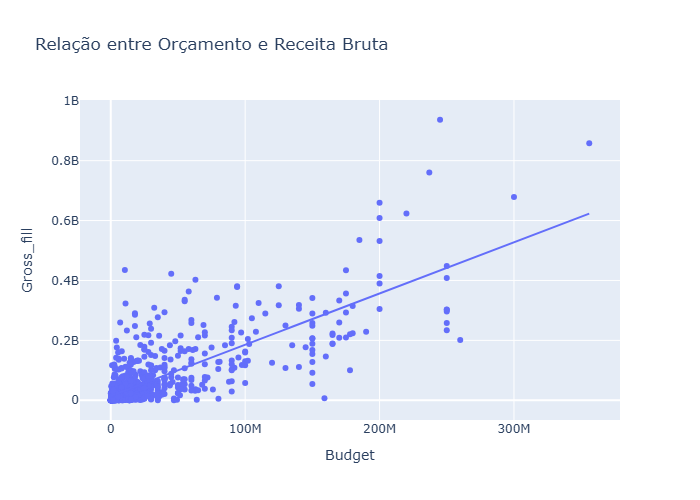

In [326]:
# orçamento x gross_fill

fig = px.scatter(
    df,
    x='Budget',
    y='Gross_fill',
    trendline='ols',
    title='Relação entre Orçamento e Receita Bruta'
)
fig.update_layout(
    width=800,
    height=600
)
fig.show()


path_img = pasta_img + 'orcamento_x_gross.png'
fig.write_image(path_img, scale = 3)


Pecebe-se que há uma correlação positiva entre o orçamento e a receita bruta, indicando que filmes com orçamentos mais altos tendem a gerar receitas maiores. No entanto, a dispersão dos pontos sugere que outros fatores também influenciam significativamente a receita, como gênero, elenco, marketing e recepção crítica.

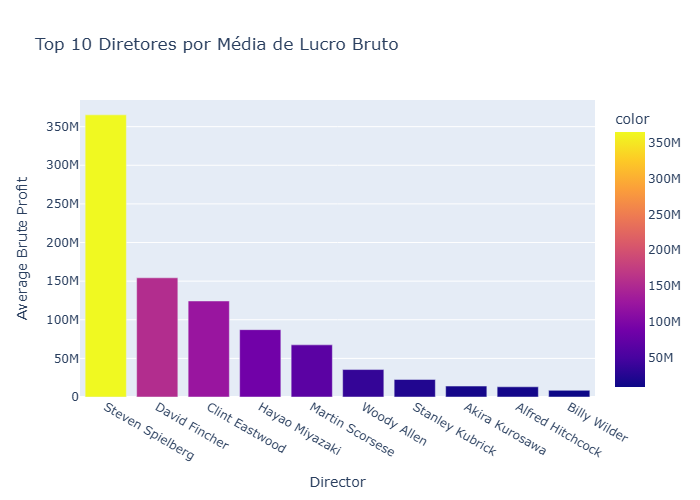

In [327]:
top_directors_ = df['Director'].value_counts().head(10).index
top_directors = df[df['Director'].isin(top_directors_)].groupby('Director')['Brute_Profit'].mean().sort_values(ascending=False).head(10)
fig = px.bar(
    top_directors,
    x=top_directors.index,
    y=top_directors.values,
    labels={'x': 'Director', 'y': 'Average Brute Profit'},
    title='Top 10 Diretores por Média de Lucro Bruto',
    color=top_directors.values,
)

fig.update_layout(
    width=800,
    height=600
)

fig.show()

path_img = pasta_img + 'top10_directors_brute_profit.png'
fig.write_image(path_img, scale = 3)



Dá para perceber que dentre os atores com mais filmes no df, Steven Spilberg, por mais que o dorbo do segundo lugar é o que mais gerou profit bruto. Dessa forma é importante analisar seus filmes

In [328]:
df[df['Director'] == 'Steven Spielberg'][['Series_Title', 'Brute_Profit']].sort_values(by='Brute_Profit', ascending=False).head(10)

,Series_Title,Brute_Profit
261,Jurassic Park,857100000.0
687,E.T. the Extra-Terrestrial,786807407.0
414,Jaws,463653000.0
167,Indiana Jones and the Last Crusade,426171806.0
23,Saving Private Ryan,411840909.0
71,Raiders of the Lost Ark,371925971.0
242,Catch Me If You Can,300114312.0
6,Schindler's List,299365567.0
987,Close Encounters of the Third Kind,286889114.0
950,Minority Report,256372926.0


Fica evidente que Steven Spielberg é um diretor que consistentemente gera altos lucros brutos em seus filmes. Destaque para E.T que é um dois filmes com mais alto ROI


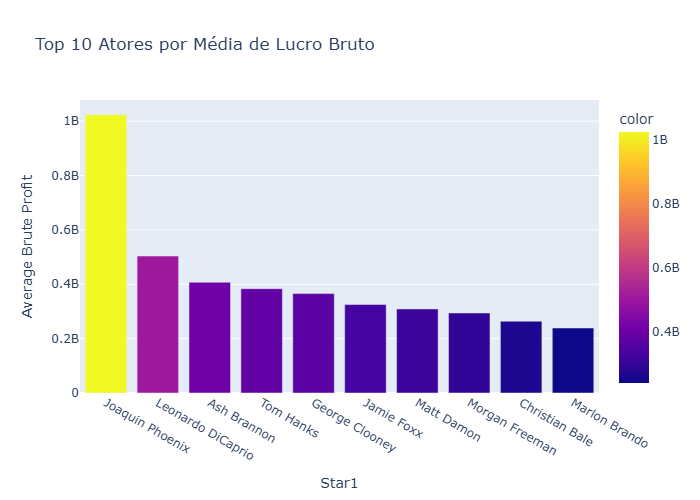

In [329]:
# star1 2 3 4
stars = ['Star1', 'Star2', 'Star3', 'Star4']
top_stars_ = df[stars].apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False).head(10).index
top_stars = df[df['Star1'].isin(top_stars_) | df['Star2'].isin(top_stars_) | df['Star3'].isin(top_stars_) | df['Star4'].isin(top_stars_)].groupby('Star1')['Brute_Profit'].mean().sort_values(ascending=False).head(10)
fig = px.bar(
    top_stars,
    x=top_stars.index,
    y=top_stars.values,
    labels={'x': 'Star', 'y': 'Average Brute Profit'},
    title='Top 10 Atores por Média de Lucro Bruto',
    color=top_stars.values,
)
fig.update_layout(
    width=800,
    height=600
)
fig.show()

path_img = pasta_img + 'top10_actors_brute_profit.png'
fig.write_image(path_img, scale = 3)


In [330]:
budget_median = df['Budget'].median()
revenue_median = df['Revenue'].median()

print(f'Median Budget: {budget_median}')
print(f'Median Revenue: {revenue_median}')


better_returns = df.sort_values(by='ROI', ascending=False).head(10)
better_returns = better_returns[better_returns['Budget'] > 1000]
display(better_returns)

Median Budget: 9000000.0
Median Revenue: 40023618.0


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,...,Production_Companies,Production_Countries,Keywords,date_details,Gross_fill,Brute_Profit,ROI,Certificate_ord_external,Timestamp,Recommendation_Index
849,Enter the Dragon,1973,NC-17,102,"Action, Crime, Drama",7.7,A secret agent comes to an opium lord's island fortress with other fighters for a martial-arts tournament.,83.0,Robert Clouse,Bruce Lee,...,"['Concord Productions', 'Warner Bros. Pictures', 'Orange Sky Golden Harvest', 'Sequoia Pictures']","['Hong Kong', 'United States of America']","['island', 'martial arts', 'kung fu', 'temple', 'monk', 'spy', 'shaolin', 'sister', 'hong kong', 'shaolin monk', 'east asian lead', 'martial arts tournament', 'crime lord']",1973-07-26,25000000.0,399150000.0,469.588235,4,112492800,7.218686
543,Night of the Living Dead,1968,Unrated,96,"Horror, Thriller",7.9,A ragtag group of Pennsylvanians barricade themselves in an old farmhouse to remain safe from a horde of flesh-eating ghouls that are ravaging the East Coast of the United States.,89.0,George A. Romero,Duane Jones,...,['Image Ten'],['United States of America'],"['sibling relationship', 'pennsylvania, usa', 'loss of loved one', 'gun', 'gas station', 'cemetery', 'cellar', 'halloween', 'house', 'barricade', 'zombie', 'black and white', 'trapped', 'bitten', 'farm house', 'frantic', 'satirical', 'anxious', 'intense', 'foreboding', 'frightened', 'horrified']",1968-10-01,89029.0,30122452.0,264.232035,0,-39484800,7.231053
278,Rocky,1976,G,120,"Drama, Sport",8.1,A small-time boxer gets a supremely rare chance to fight a heavy-weight champion in a bout in which he strives to go the distance for his self-respect.,70.0,John G. Avildsen,Sylvester Stallone,...,['Winkler Films'],['United States of America'],"['underdog', 'philadelphia, pennsylvania', 'transporter', ""love of one's life"", 'italian american', 'sports', 'fight', 'independence', 'publicity', 'boxer', 'training', 'lovers', 'world champion', 'victory', 'surprise', 'boxing', 'absurd', 'hopeful']",1976-11-20,117235247.0,224253184.0,224.253184,2,217296000,7.424484
843,Halloween,1978,NC-17,91,"Horror, Thriller",7.7,"Fifteen years after murdering his sister on Halloween night 1963, Michael Myers escapes from a mental hospital and returns to the small town of Haddonfield, Illinois to kill again.",87.0,John Carpenter,Donald Pleasence,...,"['Compass International Pictures', 'Falcon International Productions']",['United States of America'],"['mask', 'police', 'halloween', 'babysitter', 'marijuana', 'stalking', 'serial killer', 'maniac', 'killing spree', 'family', 'evil', 'psychotic', 'escaped killer']",1978-10-24,47000000.0,69935597.0,215.186452,4,278035200,7.300989
815,Clerks,1994,Unrated,92,Comedy,7.7,"A day in the lives of two convenience clerks named Dante and Randal as they annoy customers, discuss movies, and play hockey on the store roof.",70.0,Kevin Smith,Brian O'Halloran,...,['View Askew Productions'],['United States of America'],"['salesclerk', 'work', 'new jersey', 'loser', 'male friendship', 'junk food', 'black and white', 'video store', 'aftercreditsstinger', 'day in a life', 'workplace comedy', 'convenience store', 'wry']",1994-01-22,3151130.0,3123555.0,113.274887,4,759196800,7.136906
313,Gone with the Wind,1939,G,238,"Drama, History, Romance",8.1,A manipulative woman and a roguish man conduct a turbulent romance during the American Civil War and Reconstruction periods.,97.0,Victor Fleming,George Cukor,...,"['Selznick International Pictures', 'Metro-Goldwyn-Mayer']",['United States of America'],"['civil war', 'based on novel or book', 'marriage crisis', 'loss of loved one', 'widow', 'atlanta', 'slavery', 'plantation', 'typhus', 'romance', 'casualty of war', 'second marriage', 'revisionist history', 'american civil war', 'technicolor', 'racist stereotype', 'reconstruction era', 'businesswoman', '1860s', '1870s', 'antebellum south', 'powerful', 'pro slavery', 'lost cause']",1939-12-15,

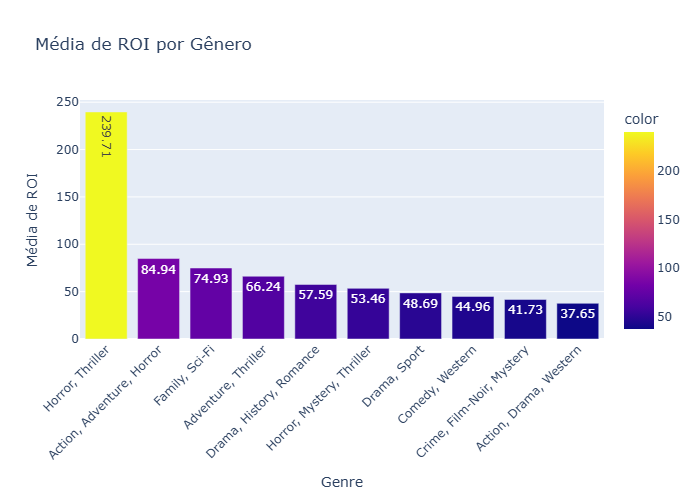

In [331]:
#entendendo roi por genero

roi_by_genre = df.groupby('Genre')['ROI'].mean().sort_values(ascending=False).head(10)
fig = px.bar(
    roi_by_genre,
    x=roi_by_genre.index,
    y=roi_by_genre.values,
    title='Média de ROI por Gênero',
    labels={'x': 'Gênero', 'y': 'Média de ROI'},
    text_auto='.2f',
    color=roi_by_genre.values,

)
fig.update_layout(xaxis_tickangle=-45)

fig.show()

path_img = pasta_img + 'roi_by_genre.png'
fig.write_image(path_img, scale = 3)

#mostrando figura no arquivo


### Filmes de terror/horror: Baixo Custo, Retorno alto

Ao analisar o Retorno sobre o Investimento (ROI) em relação ao Orçamento dos filmes, o gráfico revela um padrão claro e atípico para o gênero de Horror. Enquanto a maioria dos gêneros apresenta uma distribuição variada de custos e retornos, os filmes de terror se concentram notavelmente no quadrante de baixo orçamento e altíssimo ROI.

Esse comportamento, evidenciado pelos dados, pode ser justificado pela natureza única do gênero. Filmes de terror frequentemente não dependem de grandes estrelas ou efeitos visuais caros para serem eficazes. Em vez disso, seu sucesso muitas vezes é impulsionado pelo "boca a boca" e por um alto potencial de viralização na internet, amplificado por lendas urbanas e um marketing de guerrilha de baixo custo. Exemplos clássicos dessa estratégia incluem filmes como "A Bruxa de Blair" e "Atividade Paranormal", que se tornaram fenômenos culturais com orçamentos mínimos.

Insight: para um estúdio que não pode investir muito dinheiro em um filme, uma boa estratégia é focar em filmes de terror e ganhar capilaridade no marketing organico

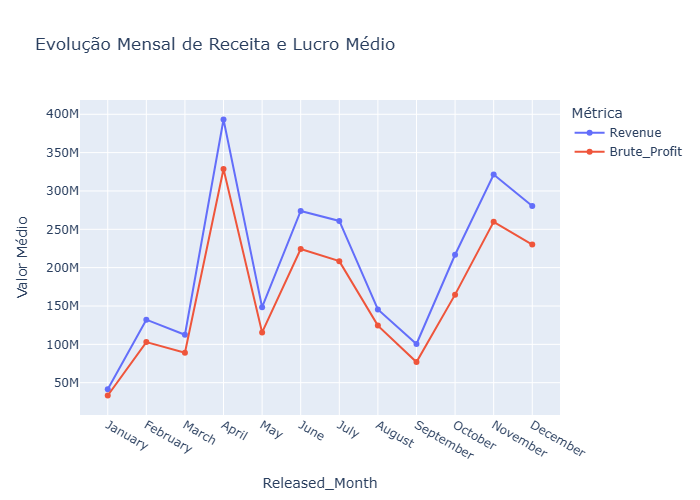

In [332]:
# Garantir que reduced é uma cópia
reduced = df[df['Released_Year'] >= 1980].copy()

# Extrair o nome do mês
reduced['Released_Month'] = pd.to_datetime(reduced['date_details']).dt.month_name(locale='en_US')

# Agrupar por mês
monthly = (
    reduced
    .groupby('Released_Month')[['Revenue', 'Brute_Profit']]
    .mean()
    .reset_index()
    .melt(
        id_vars='Released_Month',
        value_vars=['Revenue', 'Brute_Profit'],
        var_name='Métrica',
        value_name='Valor Médio'
    )
)

# Opcional: garantir ordem cronológica (Jan → Dec)
from calendar import month_name
order = list(month_name)[1:]  # ['January', 'February', ..., 'December']
monthly['Released_Month'] = pd.Categorical(monthly['Released_Month'], categories=order, ordered=True)
monthly = monthly.sort_values('Released_Month')

fig = px.line(
    monthly,
    x='Released_Month',
    y='Valor Médio',
    color='Métrica',
    markers=True,
    title='Evolução Mensal de Receita e Lucro Médio'
)
fig.update_layout(width=900, height=600)
fig.show()

path_img = pasta_img + 'monthly_revenue_brute_profit.png'
fig.write_image(path_img, scale = 3)



### Sazonalidade de Receita e Lucro

- Observa-se uma **variação relevante** entre receita e lucro bruto ao longo dos meses.  
- **Abril** e **novembro** destacam-se como meses de maiores receitas médias, sugerindo períodos que os blockbusters são lançados.  
- Já os meses de **setembro** e **janeiro** apresentam valores mais baixos, indicando menor retorno médio.  
- A diferença entre **receita e lucro** mostra a importância de considerar **custos de produção e distribuição**, além do faturamento.  
- Esses padrões reforçam que fatores **macroeconômicos e sazonais** (feriados, verão/inverno, datas comemorativas, férias escolares) influenciam fortemente o desempenho de um filme.  


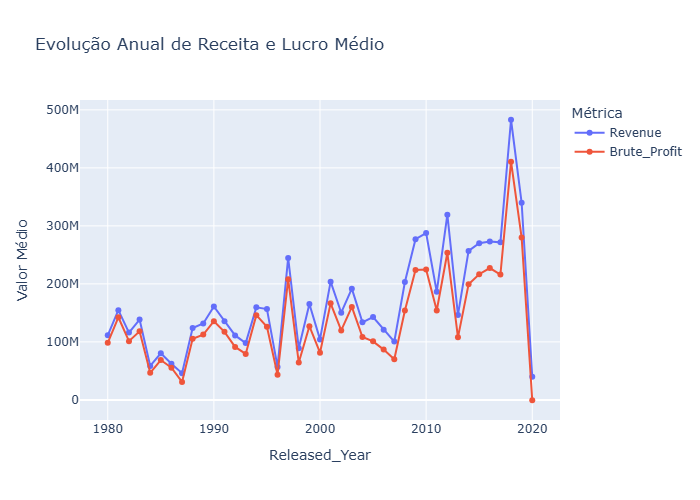

In [333]:
# Evolução anual de receita e lucro médio
annual = (
    reduced
    .groupby('Released_Year')[['Revenue', 'Brute_Profit']]
    .mean()
    .reset_index()
    .melt(
        id_vars='Released_Year',
        value_vars=['Revenue', 'Brute_Profit'],
        var_name='Métrica',
        value_name='Valor Médio'
    )
)
fig = px.line(
    annual,
    x='Released_Year',
    y='Valor Médio',
    color='Métrica',
    markers=True,
    title='Evolução Anual de Receita e Lucro Médio'
)
fig.update_layout(width=900, height=600)
fig.show()

path_img = pasta_img + 'annual_revenue_brute_profit.png'
fig.write_image(path_img, scale = 3)


### Variação Anual de Receita e Lucro

- Devido à **pouca amostragem em alguns anos**, os valores apresentaram grande variação.  
- O **ano de 2020** registrou números extremamente baixos, possivelmente reflexo do **choque inicial da pandemia da COVID-19**, que afetou diretamente a indústria cinematográfica. Além disso percebe-se um numero de amostras menor que 10. Isso também pode indicar que o df foi extraido no meio de 2020 ou antes
- Observa-se novamente a forte influência de **fatores macroeconômicos** sobre o desempenho financeiro dos filmes.  
- **Períodos de crise** tendem a gerar quedas significativas, como ocorreu em anos de recessão econômica ou instabilidade global.  


Claro. Aqui estão os dois textos formatados para você usar em seu Jupyter Notebook.

---

### **Célula 1: Introdução e Contexto do Problema**

(Use esta célula no início do seu notebook, antes do código.)

## Análise Preditiva de Gênero Cinematográfico a partir da Sinopse

Este projeto busca investigar a relação entre a narrativa textual de um filme e sua classificação de gênero. A coluna `Overview`, que contém a sinopse de cada filme, é uma fonte rica de dados não estruturados. A partir dela, levantamos a seguinte questão:

> **Quais insights podem ser tirados com a coluna `Overview`? É possível inferir o gênero do filme a partir dessa coluna?**

Para responder a essa pergunta, partiremos de algumas considerações:
* **Hipótese:** A linguagem, os temas e as palavras-chave utilizadas na sinopse de um filme contêm "sinais" textuais que se correlacionam fortemente com seu gênero.
* **Abordagem:** Utilizaremos técnicas de **Processamento de Linguagem Natural (NLP)** para converter o texto das sinopses em um formato numérico que um modelo de Machine Learning possa entender.
* **Modelo:** Treinaremos um classificador de **Regressão Logística** para aprender os padrões que conectam o texto de uma sinopse a seu gênero principal. A avaliação do modelo nos dirá o quão viável é essa previsão.



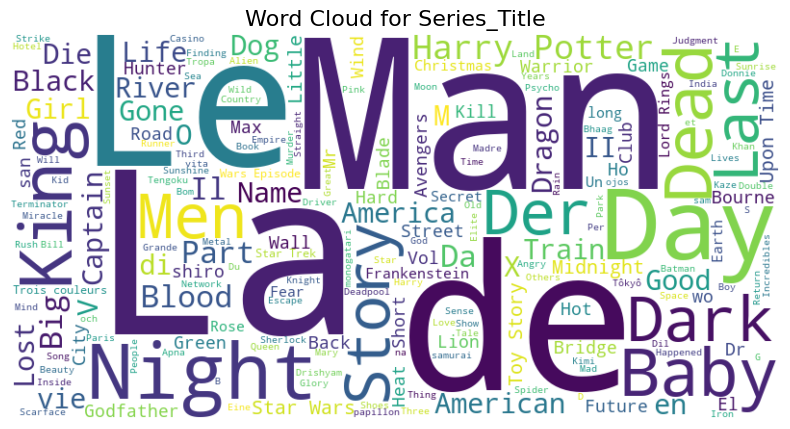

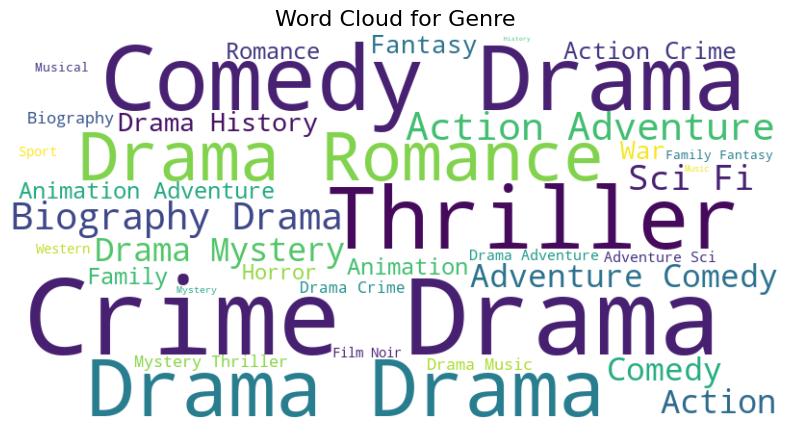

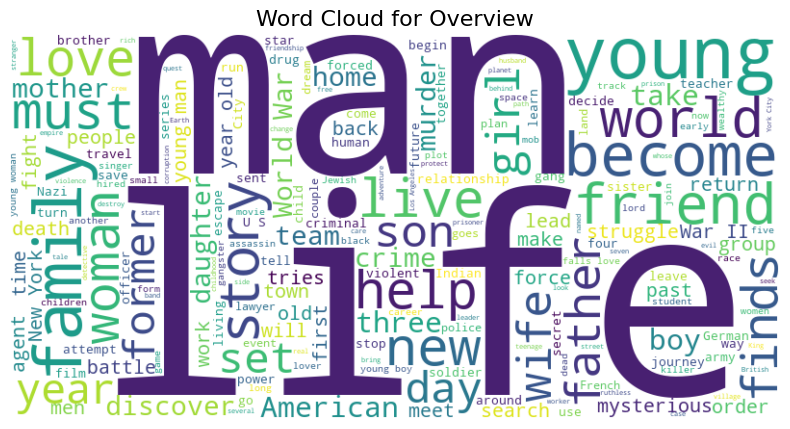

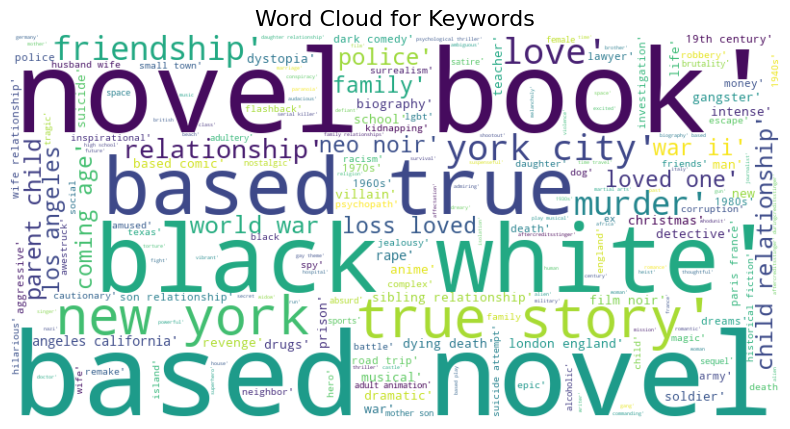

In [334]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def remove_basic_text(text):
    basic_words = set([
        'the', 'and', 'a', 'to', 'of', 'in', 'is', 'it', 'that', 'on', 'for',
        'with', 'as', 'this', 'by', 'an', 'at', 'from', 'be', 'are', 'was',
        'but', 'not', 'or', 'his', 'her', 'they', 'you', 'all', 'one',
        'we', 'there', 'their', 'so', 'if', 'about', 'Le', 'La', 'find', 'two'
    ])
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in basic_words]
    return ' '.join(filtered_words)


for i in ['Series_Title', 'Genre', 'Overview', 'Keywords']:
    text = ' '.join(df[i].dropna().astype(str).values)
    text = remove_basic_text(text)

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',
        random_state=42
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {i}', fontsize=16)
    plt.show()
    path_img = pasta_img + f'wordcloud_{i}.png'
    plt.savefig(path_img, bbox_inches='tight', dpi=300)
    plt.close()
    





Essas nuves de palavras nos dão uma visão geral sobre o comportamento das variáveis. 

In [335]:
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


dfr = df.copy()

dfr['Primary_Genre'] = dfr['Genre'].apply(lambda x: x.split(',')[0])

X = dfr['Overview']
y = dfr['Primary_Genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

text_clf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(random_state=42)),
])

text_clf_pipeline.fit(X_train, y_train)

predictions = text_clf_pipeline.predict(X_test)

full_genres_test = dfr.loc[y_test.index]['Genre']

correct_predictions_count = sum([1 for pred, true_list in zip(predictions, full_genres_test) if pred in true_list])

new_accuracy = correct_predictions_count / len(predictions)

print(f"A precisão (previsto contido na lista real) é: {new_accuracy:.2%}\n")

results = pd.DataFrame({
    'Gêneros Reais (Todos)': full_genres_test,
    'Gênero Previsto': predictions
})

# CORREÇÃO AQUI: Use o nome de coluna exato que foi definido acima.
results['Acertou?'] = [pred in true_list for pred, true_list in zip(results['Gênero Previsto'], results['Gêneros Reais (Todos)'])]

pd.set_option('display.max_colwidth', None)
print(results)

A precisão (previsto contido na lista real) é: 80.67%

           Gêneros Reais (Todos) Gênero Previsto  Acertou?
453          Drama, Romance, War           Drama      True
793         Comedy, Drama, Music           Drama      True
209     Drama, Mystery, Thriller           Drama      True
309        Drama, Music, Romance           Drama      True
740  Animation, Adventure, Drama           Drama      True
..                           ...             ...       ...
819    Biography, Drama, History           Drama      True
351                        Drama           Drama      True
835         Comedy, Crime, Drama           Drama      True
298                 Crime, Drama           Drama      True
765    Biography, Drama, History           Drama      True

[150 rows x 3 columns]


Após treinar e avaliar o modelo, obtivemos uma performance robusta, que nos permite tirar conclusões diretas sobre nossa questão inicial.

### **1. O resultado confirma: a sinopse é um forte preditor de gênero**
O modelo alcançou uma precisão de **80.67%**. Este é um resultado excelente e confirma que **sim, é totalmente possível inferir o gênero de um filme a partir de sua sinopse**. Isso significa que o algoritmo foi capaz de aprender o "DNA textual" de cada gênero, associando padrões de palavras e temas a um rótulo específico com alta assertividade.

### **2. O "Drama" como gênero central e abrangente**
Ao analisar as previsões, um padrão claro emerge: o modelo é excepcionalmente bom em identificar o gênero **Drama**. Filmes listados como `Animation, Adventure, Drama` ou `Comedy, Drama, Music` são corretamente classificados como `Drama`. Isso revela dois insights importantes:
* Muitos filmes, independentemente de seus subgêneros, têm uma **base narrativa dramática**, que o modelo captura com eficiência.
* O vocabulário associado ao drama (conflito, relacionamento, jornada, superação) é um sinal muito forte e consistente nos dados, tornando-o o gênero mais fácil de ser previsto.

### **3. Aplicações Práticas**
A capacidade de prever gênero a partir do texto tem aplicações valiosas:
* **Catalogação Automática:** Em plataformas de streaming ou bases de dados, este modelo poderia ser usado para **sugerir ou atribuir automaticamente tags de gênero**, economizando tempo e garantindo consistência.
* **Sistemas de Recomendação Avançados:** Em vez de apenas recomendar filmes com o mesmo rótulo de gênero, um sistema poderia sugerir filmes **tematicamente similares** com base na análise de suas sinopses, oferecendo recomendações mais refinadas e personalizadas.

---

### Conclusões Gerais

Depos de uma análise aprofundada do dataframe enriquecido, ficou evidente que os filmes se comportam de diversas formas. Diverssas corre